In [1]:
import pandas as pd
import sklearn.preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('iris.csv')
features = df.columns[:4]

x_orig = df[features]
y_orig = df['Species']


In [4]:
#standardizacija podataka
x = pd.DataFrame(prep.StandardScaler().fit_transform(x_orig), columns = features)

In [5]:
pca = PCA()
pca.fit(x)

x_pca = pd.DataFrame(pca.transform(x))
x_pca.columns = ['pca%d'%i for i in range(1, pca.n_components_+1)]



In [6]:
#kolicina vrijanse
pca.explained_variance_ratio_

for i, ev in zip(range(1, pca.n_components_+1), pca.explained_variance_ratio_):
    print("pca%d: %.10f"%(i,ev))

pca1: 0.7296244541
pca2: 0.2285076179
pca3: 0.0366892189
pca4: 0.0051787091


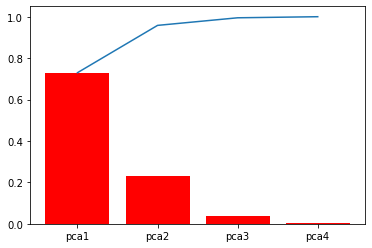

In [7]:
#graficki prikaz
plt.figure()
plt.plot(x_pca.columns, np.cumsum(pca.explained_variance_ratio_))
plt.bar(x_pca.columns, pca.explained_variance_ratio_, label = 'Procenat varijanse' , color = 'red')

plt.show()

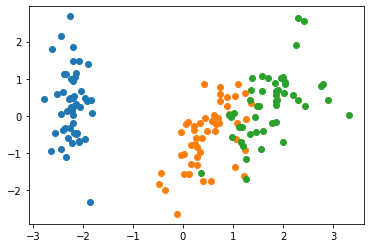

In [9]:
#Grafcki prikaz skupa iris pomocu rasprsenih elemenata koriscenjem prve dve glavne komponente
# plt.figure()
classes = y_orig.unique()

for i, cls in zip(range(0, len(classes)), classes):
    class_samples = x_pca.iloc[ y_orig[y_orig == cls].index]
#     print(class_samples)
    plt.scatter(class_samples['pca1'], class_samples['pca2'])
    
plt.show()